# opencv Camera resolution
- https://www.learnpythonwithrune.org/find-all-possible-webcam-resolutions-with-opencv-in-python/ --> well written but not everything works on my system
- https://www.kurokesu.com/main/2020/07/12/pulling-full-resolution-from-a-webcam-with-opencv-windows/ --> that helped

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

In [34]:

cap = cv.VideoCapture(0, cv.CAP_DSHOW)
cap.set(cv.CAP_PROP_FPS, 30.0)
cap.set(cv.CAP_PROP_BUFFERSIZE, 0)
cap.set(cv.CAP_PROP_FOURCC, cv.VideoWriter.fourcc('m','j','p','g'))
cap.set(cv.CAP_PROP_FOURCC, cv.VideoWriter.fourcc('M','J','P','G'))
cap.set(cv.CAP_PROP_FRAME_WIDTH, 1920)
cap.set(cv.CAP_PROP_FRAME_HEIGHT, 1080)

True

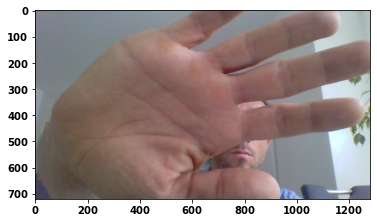

In [39]:

success, img_bgr = cap.read()
if success:
    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    img_bgr.shape

In [29]:
url = "https://en.wikipedia.org/wiki/List_of_common_resolutions"
table = pd.read_html(url)[0]
table.columns = table.columns.droplevel()
table

,Designation,Usage,W,(px),H,Storage,Display,Pixel,Total pixels
0,0.26K1,Microvision,16,×,16,1∶1,1∶1,1∶1,256
1,0.46K1,Timex Datalink USB[1][2],42,×,11,42∶11,1∶1,5:9,462
2,1.02K1,PocketStation,32,×,32,1∶1,1∶1,1∶1,1024
3,1.2K3,Etch A Sketch Animator,40,×,30,4∶3,4∶3,1∶1,1200
4,1.34K1,Epson RC-20[3],42,×,32,42∶32,1∶1,0.762,1344
...,...,...,...,...,...,...,...,...,...
208,8K Full Format,DCI 8K:,8192,×,4320,1.90∶1,1.90∶1,1.002,35389440
209,—,NaN,8192,×,4608,16∶9,16∶9,1∶1,37748736
210,UW10K,Ultra-Wide 10K:,10240,×,4320,21∶9,21∶9,1∶1,44236800
211,8K Fulldome,8K Fulldome,8192,×,8192,1∶1,1∶1,1∶1,67108864


In [7]:
def try_cam_res(cap: cv.VideoCapture, width: int, height: int) -> bool:
    # set desired resolution
    cap.set(cv.CAP_PROP_FRAME_WIDTH, width)
    cap.set(cv.CAP_PROP_FRAME_HEIGHT, height)
    
    # try if it works
    print(f"try_cam_res({width=}, {height=}) -> ", end="")
    try:
        _, img = cap.read()
    except Exception:
        print("not working!")
        return False
    else:
        print("ok, img.shape=", img.shape)
        return True
    

In [10]:
best_res = (0, 0)
for w, h in zip(table["W"], table["H"]):
    if try_cam_res(cap, w, h):
        if w * h > best_res[0] * best_res[1]:
            best_res = (w, h)
print("Best resolution supported:", best_res)

try_cam_res(width=16, height=16) -> ok, img.shape= (120, 160, 3)
try_cam_res(width=42, height=11) -> ok, img.shape= (120, 160, 3)
try_cam_res(width=32, height=32) -> ok, img.shape= (120, 160, 3)
try_cam_res(width=40, height=30) -> ok, img.shape= (120, 160, 3)
try_cam_res(width=42, height=32) -> ok, img.shape= (120, 160, 3)
try_cam_res(width=48, height=32) -> ok, img.shape= (120, 160, 3)
try_cam_res(width=60, height=40) -> ok, img.shape= (120, 160, 3)
try_cam_res(width=84, height=48) -> ok, img.shape= (120, 160, 3)
try_cam_res(width=64, height=64) -> ok, img.shape= (120, 160, 3)
try_cam_res(width=72, height=64) -> ok, img.shape= (120, 160, 3)
try_cam_res(width=128, height=36) -> ok, img.shape= (120, 160, 3)
try_cam_res(width=75, height=64) -> ok, img.shape= (120, 160, 3)
try_cam_res(width=150, height=40) -> ok, img.shape= (120, 160, 3)
try_cam_res(width=96, height=64) -> ok, img.shape= (120, 160, 3)
try_cam_res(width=96, height=64) -> ok, img.shape= (120, 160, 3)
try_cam_res(width=128, 

In [11]:
RESOLUTIONS = [(320, 240), (480, 320), (640, 480), (960, 720), (1024, 768), (1280, 960), (1980, 1024)]
for w, h in RESOLUTIONS:
    try_cam_res(cap, w, h)

try_cam_res(width=320, height=240) -> ok, img.shape= (240, 320, 3)
try_cam_res(width=480, height=320) -> ok, img.shape= (288, 352, 3)
try_cam_res(width=640, height=480) -> ok, img.shape= (480, 640, 3)
try_cam_res(width=960, height=720) -> ok, img.shape= (720, 1280, 3)
try_cam_res(width=1024, height=768) -> ok, img.shape= (720, 1280, 3)
try_cam_res(width=1280, height=960) -> ok, img.shape= (720, 1280, 3)
try_cam_res(width=1980, height=1024) -> ok, img.shape= (720, 1280, 3)


In [19]:
cap.release()